In [1]:
from dqn_agent import DQN

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
names=[] # keep track of names for plotting at the end

# basic parameters
p = dict(
    env_name =              'BreakoutNoFrameskip-v4', # use NoFrameskip-v4 version
    group_dir=              'SI_tests',
    name =                  'DDQN',
    overwrite_previous=     False,
    asynchronous=           False,

    doubleQ=                True,
    dueling=                False,
    noisy_linear=           False,
    categorical_DQN=        False,
    prioritized_replay=     False,
    n_step_learning=        False,
    group_training_losses = True,
    data_plotting =         True,
    
    screen_size=        42,
    trailing_avg_trail= 40,
    eval_interval=      20_000,
    max_steps=          15_000_000, 
    record_interval=    5_000_000, 
    n_games_per_eval=   10,
    n_envs=             40,
    pbar_update_interval= 800,
    seed=               42
    )


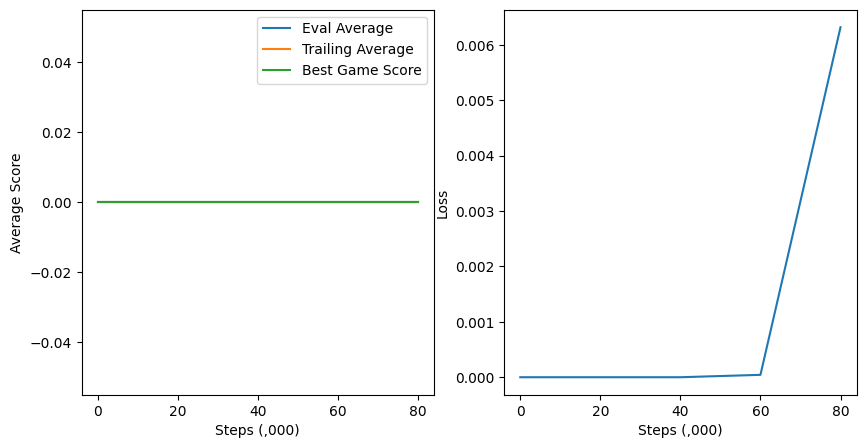

steps:  1%|▏                    |98,400/15,000,000[t:02:21/7:10:37], eps=4,054, ev_avg=0.0, tr_avg=0.0, rate=691.1 stp/s

In [ ]:
p.update(
    name=               'DDQN',
    note=               f'''{p['n_envs']} vectorized environments. ''',

    doubleQ=            True,
    dueling=            False,
    noisy_linear=       False,
    categorical_DQN=    False,
    prioritized_replay= False,
    n_step_learning=    True,
    n_envs=             20,
    
    )
dqn = DQN(p)

dqn.train()
names.append(dqn.filepaths.sub_dir)


In [ ]:
''' Vanilla DQN'''

p.update(
    name=               'DQN',
    doubleQ=            False,
    dueling=            False,
    noisy_linear=       False,
    categorical_DQN=    False,
    prioritized_replay= False,
    n_step_learning=    False,
    )
dqn = DQN(p)
dqn.train()
names.append(dqn.filepaths.sub_dir)


In [ ]:
''' Rainbow DQN'''

p.update(
    name=               'Rainbow',
    doubleQ=            True,
    dueling=            True,
    noisy_linear=       True,
    categorical_DQN=    True,
    prioritized_replay= True,
    n_step_learning=    True,
    )
dqn = DQN(p)
dqn.train()
names.append(dqn.filepaths.sub_dir)



In [ ]:
# plot all the results in the log folder
import importlib, os
import modules.utils
importlib.reload(modules.utils)
plot = modules.utils.plot_multiple_results

col = 'trailing_avg'; assert col in ['best_score','eval_avg','trailing_avg','loss']
plot( names, 'trailing_avg')
